Check Underfitting and Overfitting for Stock

In [1]:
# Library
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
stock_name = 'AMD'
start = '2018-01-01' 
end = '2018-09-14'
df = yf.download(stock_name, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
1,2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2,2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
3,2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
4,2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [4]:
df.shape

(178, 7)

In [5]:
X = df.index.values
y = df['Adj Close'].values

In [6]:
X.shape

(178,)

In [7]:
y.shape

(178,)

In [8]:
X = X.reshape((178,-1))

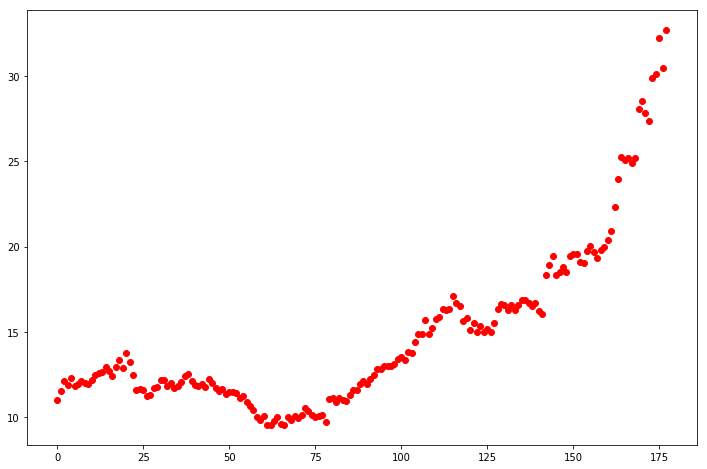

In [9]:
plt.figure(figsize=(12,8))

plt.plot(X, y, 'ro')
plt.show()

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
 a = model.coef_ * X + model.intercept_
 a

array([[ 8.10233949],
       [ 8.17837349],
       [ 8.25440749],
       [ 8.33044149],
       [ 8.40647548],
       [ 8.48250948],
       [ 8.55854348],
       [ 8.63457748],
       [ 8.71061148],
       [ 8.78664547],
       [ 8.86267947],
       [ 8.93871347],
       [ 9.01474747],
       [ 9.09078147],
       [ 9.16681546],
       [ 9.24284946],
       [ 9.31888346],
       [ 9.39491746],
       [ 9.47095146],
       [ 9.54698545],
       [ 9.62301945],
       [ 9.69905345],
       [ 9.77508745],
       [ 9.85112145],
       [ 9.92715544],
       [10.00318944],
       [10.07922344],
       [10.15525744],
       [10.23129144],
       [10.30732543],
       [10.38335943],
       [10.45939343],
       [10.53542743],
       [10.61146143],
       [10.68749542],
       [10.76352942],
       [10.83956342],
       [10.91559742],
       [10.99163142],
       [11.06766541],
       [11.14369941],
       [11.21973341],
       [11.29576741],
       [11.37180141],
       [11.4478354 ],
       [11

Underfitted Model

Low variances and High bias

Too simple and not generalize well

Less Features

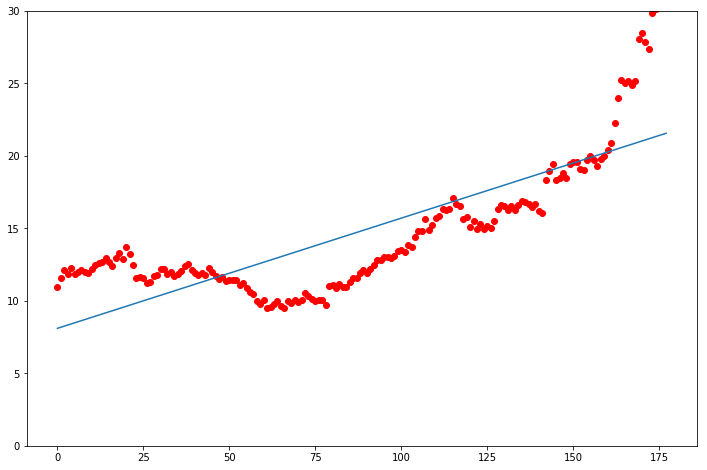

In [12]:
# Linear Regression
# Underfitted 
plt.figure(figsize=(12,8))
plt.plot(X, y, 'ro', X, a)
axes = plt.gca()
axes.set_ylim([0, 30])
plt.show()

In [13]:
print(model.score(X, y))

0.6227203882581938


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Lesser the MSE => smaller is the error => better the estimator
# [MAE] ≤ [RMSE]. The RMSE result will always be larger or equal to the MAE
# 0 to 1000 - an RMSE of 0.7 is small error
# 0 to 1 - an RMSE is not small error 
meanSquaredError = mean_squared_error(X, y)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

MSE: 7690.334086691011
RMSE: 87.69454992581359


In [15]:
X = np.c_[X, X**2]
X

array([[    0,     0],
       [    1,     1],
       [    2,     4],
       [    3,     9],
       [    4,    16],
       [    5,    25],
       [    6,    36],
       [    7,    49],
       [    8,    64],
       [    9,    81],
       [   10,   100],
       [   11,   121],
       [   12,   144],
       [   13,   169],
       [   14,   196],
       [   15,   225],
       [   16,   256],
       [   17,   289],
       [   18,   324],
       [   19,   361],
       [   20,   400],
       [   21,   441],
       [   22,   484],
       [   23,   529],
       [   24,   576],
       [   25,   625],
       [   26,   676],
       [   27,   729],
       [   28,   784],
       [   29,   841],
       [   30,   900],
       [   31,   961],
       [   32,  1024],
       [   33,  1089],
       [   34,  1156],
       [   35,  1225],
       [   36,  1296],
       [   37,  1369],
       [   38,  1444],
       [   39,  1521],
       [   40,  1600],
       [   41,  1681],
       [   42,  1764],
       [   

In [16]:
model.fit(X, y)
x = np.arange(1, 179)
x = np.c_[x, x**2]
a = np.dot(X, model.coef_.transpose()) + model.intercept_

In [17]:
len(x)

178

Fitting Model

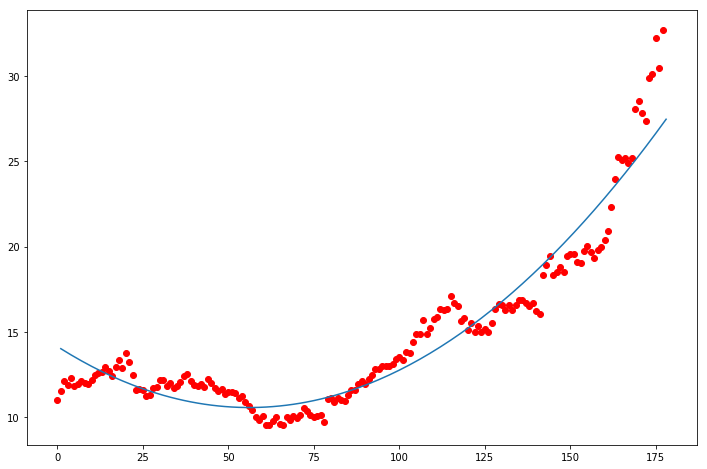

In [18]:
# Polynomial features
plt.figure(figsize=(12,8))
plt.plot(X[:, 0], y, 'ro', x[:, 0], a)
plt.show()

In [19]:
model.score(X, y)

0.9172297439488537

Over-fitting Model

Low bias and High variance

Too complex and not likely to generalize well

Required More Features

Leads to small in-sample errors, but large out-of-sample errors.

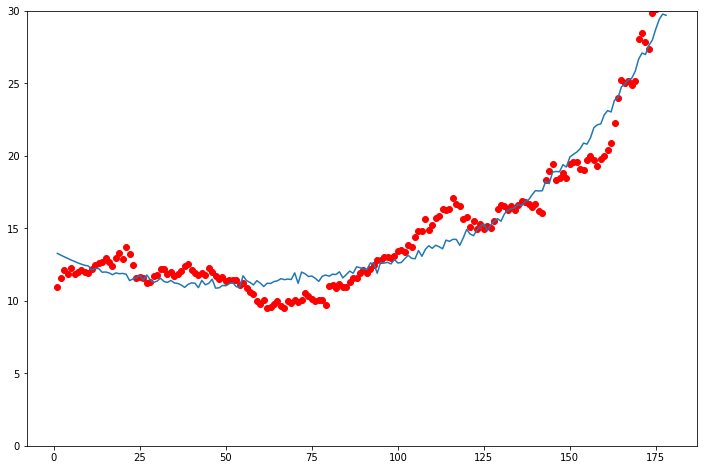

In [20]:
X = np.arange(1, 179)
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(1, 179)
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]

model.fit(X, y)
a = np.dot(x, model.coef_.transpose()) + model.intercept_

plt.figure(figsize=(12,8))
plt.plot(X[:, 0], y, 'ro', x[:, 0], a)
axes = plt.gca()
axes.set_ylim([0, 30])
plt.show()

In [21]:
model.score(X, y)

0.9405459998434336

Daily Returns

In [22]:
df['Returns'] = df['Adj Close'].pct_change().dropna()

In [23]:
df = df.dropna()

In [24]:
X = df.index.values
y = df['Returns'].values

In [25]:
X.shape

(177,)

In [26]:
X = X.reshape((177,-1))

In [27]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
 a = model.coef_ * X + model.intercept_
 a

array([[-3.41944131e-03],
       [-3.30425644e-03],
       [-3.18907157e-03],
       [-3.07388670e-03],
       [-2.95870183e-03],
       [-2.84351696e-03],
       [-2.72833208e-03],
       [-2.61314721e-03],
       [-2.49796234e-03],
       [-2.38277747e-03],
       [-2.26759260e-03],
       [-2.15240773e-03],
       [-2.03722286e-03],
       [-1.92203799e-03],
       [-1.80685311e-03],
       [-1.69166824e-03],
       [-1.57648337e-03],
       [-1.46129850e-03],
       [-1.34611363e-03],
       [-1.23092876e-03],
       [-1.11574389e-03],
       [-1.00055901e-03],
       [-8.85374143e-04],
       [-7.70189272e-04],
       [-6.55004400e-04],
       [-5.39819529e-04],
       [-4.24634658e-04],
       [-3.09449786e-04],
       [-1.94264915e-04],
       [-7.90800437e-05],
       [ 3.61048276e-05],
       [ 1.51289699e-04],
       [ 2.66474570e-04],
       [ 3.81659442e-04],
       [ 4.96844313e-04],
       [ 6.12029184e-04],
       [ 7.27214056e-04],
       [ 8.42398927e-04],
       [ 9.5

In [29]:
print(model.score(X, y))

0.031971390677791645


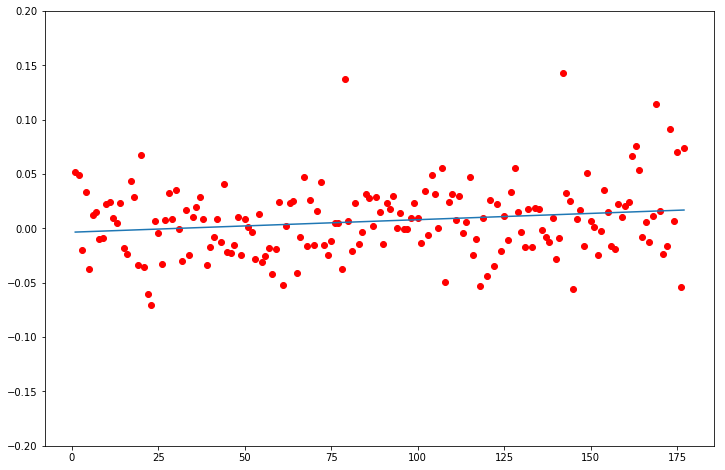

In [30]:
# Linear Regression
# Underfitted 
plt.figure(figsize=(12,8))
plt.plot(X, y, 'ro', X, a)
axes = plt.gca()
axes.set_ylim([-0.2, 0.2])
plt.show()

In [31]:
model.score(X, y)

0.031971390677791645

In [32]:
meanSquaredError = mean_squared_error(X, y)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

MSE: 10529.870781283005
RMSE: 102.61515863303534


In [33]:
X = np.c_[X, X**2]
X

array([[    1,     1],
       [    2,     4],
       [    3,     9],
       [    4,    16],
       [    5,    25],
       [    6,    36],
       [    7,    49],
       [    8,    64],
       [    9,    81],
       [   10,   100],
       [   11,   121],
       [   12,   144],
       [   13,   169],
       [   14,   196],
       [   15,   225],
       [   16,   256],
       [   17,   289],
       [   18,   324],
       [   19,   361],
       [   20,   400],
       [   21,   441],
       [   22,   484],
       [   23,   529],
       [   24,   576],
       [   25,   625],
       [   26,   676],
       [   27,   729],
       [   28,   784],
       [   29,   841],
       [   30,   900],
       [   31,   961],
       [   32,  1024],
       [   33,  1089],
       [   34,  1156],
       [   35,  1225],
       [   36,  1296],
       [   37,  1369],
       [   38,  1444],
       [   39,  1521],
       [   40,  1600],
       [   41,  1681],
       [   42,  1764],
       [   43,  1849],
       [   

In [34]:
model.fit(X, y)
x = np.arange(1, 178)
x = np.c_[x, x**2]
a = np.dot(X, model.coef_.transpose()) + model.intercept_

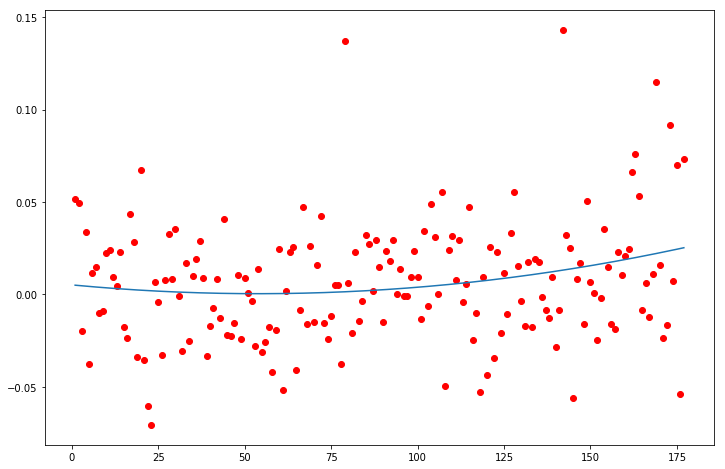

In [35]:
# Polynomial features
plt.figure(figsize=(12,8))
plt.plot(X[:, 0], y, 'ro', x[:, 0], a)
plt.show()

In [36]:
model.score(X, y)

0.04553743583036962

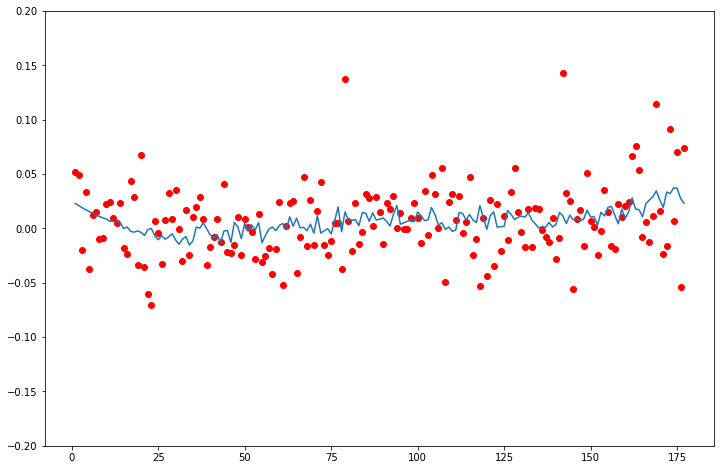

In [37]:
X = np.arange(1, 178)
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(1, 178)
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]

model.fit(X, y)
a = np.dot(x, model.coef_.transpose()) + model.intercept_

plt.figure(figsize=(12,8))
plt.plot(X[:, 0], y, 'ro', x[:, 0], a)
axes = plt.gca()
axes.set_ylim([-0.2, 0.2])
plt.show()

In [38]:
model.score(X, y)

0.09900733588089616